In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os #Para adquirir el path global y guardar figuras

In [39]:
h_real = 6.62607015e-34 #J*s
e = 1.602176634e-19 #C
c = 299792458 #m/s
#R = 102.7 #Ohm En los primeros dos experimentos
R = 100.2 #Ohm
sR = 0.05
M_real = h_real/e

def y(x,m,x0): #Modelo lineal general para ajustar
    return m*(x-x0)

def sy(x,sx,m,sm,x0,sx0):
    return np.sqrt(m**2*(sx**2+sx0**2)+sm**2*(x-x0)**2)

#En deshuso
#def V(nu,M,V0): #Modelo lineal para ajustar h, q exacta. M = h/q
#    return M*nu+V0
#
#def sV(nu,snu,M,sM,V0,sV0):
#    return np.sqrt((nu*sM)**2+(M*snu)**2+sV0**2)

def V(nu,M): #Modelo lineal para ajustar h, q exacta. M = h/q
    return M*nu

def sV(nu,snu,M,sM):
    return np.sqrt((nu*sM)**2+(M*snu)**2)

In [3]:
#Lambdas directo del espectro visible
lamb_rojo, slamb_rojo = (625+700)/2, (700-625)/2
lamb_verde, slamb_verde = (500+565)/2, (565-500)/2
lamb_amarillo, slamb_amarillo = (565+590)/2, (590-565)/2
#lamb_cyan, slamb_cyan = (485+500)/2, (500-485)/2
lamb_azul, slamb_azul = (450+485)/2, (485-450)/2
lamb_IR, slamb_IR = 940, 940-760

In [3]:
#Lambdas y desviaciones estándar estimadas de la gráfica técnica
lamb_IR, slamb_IR = 945, 22 #Infrared (1)
lamb_rojo, slamb_rojo = 657, 15 #Se tomó el denominado rojo, pero hay otros tonos de rojo posibles
lamb_verde, slamb_verde = 525, 27 #Ultra Green (A)
lamb_amarillo, slamb_amarillo = 583, 18 #Yellow
lamb_azul, slamb_azul = 430, 35 #Ultra Blue
lamb_cyan, slamb_cyan = 470, 27 #Pure Blue

In [77]:
#Con cyan
L = ["Ro1","Ro2","Ve1","Ve2","Am1","Azul1","Azul2","IR"]
Nombre = ["rojo 1","rojo 2", "verde 1", "verde 2","amarillo", "azul 1","azul 2","infrarrojo"]
Lamb = np.array([lamb_rojo,lamb_rojo,lamb_verde,lamb_verde,lamb_amarillo,lamb_cyan,lamb_azul,lamb_IR])*1e-9 #m
sLamb = np.array([slamb_rojo,slamb_rojo,slamb_verde,slamb_verde,slamb_amarillo,slamb_cyan,slamb_azul,slamb_IR])*1e-9 #m
V1th = [0,0,0,0,0,0,0,0]
sV1th = [0,0,0,0,0,0,0,0]

### Método 1

In [5]:
def Read(i):
    Datos = np.loadtxt("Datos"+L[i]+".txt",skiprows=1).T
    Datos = Datos[:, Datos[0].argsort()] #Ordena datos
    
    LOW = [25,16,19,10,20,23,10,21]#indice menor
    low = LOW[i] #indice menor
    ind = np.arange(low,len(Datos[0])) #Datos a ajustar desde low hasta el máximo
    ind_extra = np.arange(0,low)
    d_ajustados = len(Datos[0])-low
    
    V1 = Datos[1][ind]
    V2 = Datos[0][ind]
    sV1 = Datos[3][ind]
    sV2 = Datos[2][ind]
    Ic = V2/R
    sIc = np.sqrt(V2**2*sR**2/(R**4)+(sV2/R)**2)
    
    V1_extra = Datos[1][ind_extra]
    V2_extra = Datos[0][ind_extra]
    sV1_extra = Datos[3][ind_extra]
    sV2_extra = Datos[2][ind_extra]
    Ic_extra = V2_extra/R
    sIc_extra = np.sqrt(V2_extra**2*sR**2/(R**4)+(sV2_extra/R)**2)
    
    return V1, Ic, sV1, sIc, V1_extra, Ic_extra, sV1_extra, sIc_extra, d_ajustados

In [66]:
#Rojo1
i = 0
V1, Ic, sV1, sIc, V1_extra, Ic_extra, sV1_extra, sIc_extra, d_ajustados = Read(i)
popt, pcov = curve_fit(y, xdata = V1, ydata = Ic, sigma = sIc)
m_fit, x0_fit = popt
sm_fit, sx0_fit = np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1])
print("m_fit = "+str(m_fit)+" +- "+str(sm_fit))
print("x0_fit = "+str(x0_fit)+" +- "+str(sx0_fit))

m_fit = 0.08545421947741375 +- 0.0011276096106633958
x0_fit = 1713.9598265831926 +- 1.5476839387967183


In [96]:
#Rojo2
i = 1
V1, Ic, sV1, sIc, V1_extra, Ic_extra, sV1_extra, sIc_extra, d_ajustados = Read(i)
popt, pcov = curve_fit(y, xdata = V1, ydata = Ic, sigma = sIc)
m_fit, x0_fit = popt
sm_fit, sx0_fit = np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1])
print("m_fit = "+str(m_fit)+" +- "+str(sm_fit))
print("x0_fit = "+str(x0_fit)+" +- "+str(sx0_fit))

m_fit = 0.16156529172551726 +- 0.011506967589816156
x0_fit = 1780.8445484790097 +- 4.464394427173474


In [99]:
#Verde1
i = 2
V1, Ic, sV1, sIc, V1_extra, Ic_extra, sV1_extra, sIc_extra, d_ajustados = Read(i)
popt, pcov = curve_fit(y, xdata = V1, ydata = Ic, sigma = sIc)
m_fit, x0_fit = popt
sm_fit, sx0_fit = np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1])
print("m_fit = "+str(m_fit)+" +- "+str(sm_fit))
print("x0_fit = "+str(x0_fit)+" +- "+str(sx0_fit))

m_fit = 0.04932791908859819 +- 0.0007583532266485239
x0_fit = 1888.3127232716035 +- 2.507666460481306


In [102]:
#Verde2
i = 3
V1, Ic, sV1, sIc, V1_extra, Ic_extra, sV1_extra, sIc_extra, d_ajustados = Read(i)
popt, pcov = curve_fit(y, xdata = V1, ydata = Ic, sigma = sIc)
m_fit, x0_fit = popt
sm_fit, sx0_fit = np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1])
print("m_fit = "+str(m_fit)+" +- "+str(sm_fit))
print("x0_fit = "+str(x0_fit)+" +- "+str(sx0_fit))

m_fit = 0.013446659584589954 +- 0.0006951073478863978
x0_fit = 2666.230174816681 +- 4.659784290695643


In [85]:
#Amarillo1
i = 4
V1, Ic, sV1, sIc, V1_extra, Ic_extra, sV1_extra, sIc_extra, d_ajustados = Read(i)
popt, pcov = curve_fit(y, xdata = V1, ydata = Ic, sigma = sIc)
m_fit, x0_fit = popt
sm_fit, sx0_fit = np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1])
print("m_fit = "+str(m_fit)+" +- "+str(sm_fit))
print("x0_fit = "+str(x0_fit)+" +- "+str(sx0_fit))

m_fit = 0.060954826949696575 +- 0.0009134918552428922
x0_fit = 1822.0942188119 +- 1.974902156291858


In [87]:
#Azul1
i = 5
V1, Ic, sV1, sIc, V1_extra, Ic_extra, sV1_extra, sIc_extra, d_ajustados = Read(i)
popt, pcov = curve_fit(y, xdata = V1, ydata = Ic, sigma = sIc)
m_fit, x0_fit = popt
sm_fit, sx0_fit = np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1])
print("m_fit = "+str(m_fit)+" +- "+str(sm_fit))
print("x0_fit = "+str(x0_fit)+" +- "+str(sx0_fit))

m_fit = 0.039416306341173726 +- 0.0014936905064095037
x0_fit = 2801.8917644478333 +- 8.075792756863747


In [89]:
#Azul2
i = 6
V1, Ic, sV1, sIc, V1_extra, Ic_extra, sV1_extra, sIc_extra, d_ajustados = Read(i)
popt, pcov = curve_fit(y, xdata = V1, ydata = Ic, sigma = sIc)
m_fit, x0_fit = popt
sm_fit, sx0_fit = np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1])
print("m_fit = "+str(m_fit)+" +- "+str(sm_fit))
print("x0_fit = "+str(x0_fit)+" +- "+str(sx0_fit))

m_fit = 0.04324573968167225 +- 0.0026229092360033133
x0_fit = 2878.9018180118096 +- 8.698030044131542


In [91]:
#IR
i = 7
V1, Ic, sV1, sIc, V1_extra, Ic_extra, sV1_extra, sIc_extra, d_ajustados = Read(i)
popt, pcov = curve_fit(y, xdata = V1, ydata = Ic, sigma = sIc)
m_fit, x0_fit = popt
sm_fit, sx0_fit = np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1])
print("m_fit = "+str(m_fit)+" +- "+str(sm_fit))
print("x0_fit = "+str(x0_fit)+" +- "+str(sx0_fit))

m_fit = 0.5937737750075394 +- 0.08962577526595315
x0_fit = 1132.8137087298692 +- 4.432573118138958


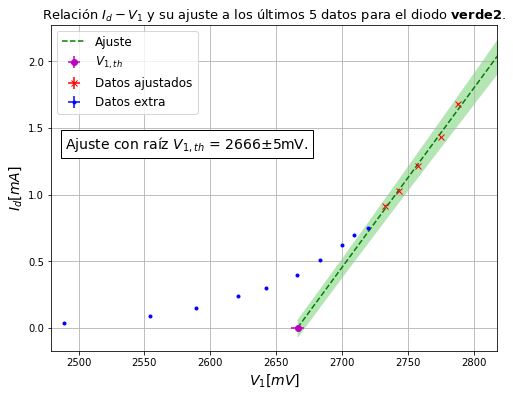

In [106]:
#Gráfica individual
V_cont = np.linspace(x0_fit,V1.max()+30,100)

fig = plt.figure(figsize=(8,6))
plt.errorbar(x0_fit,0,0,sx0_fit,"mo",label=r"$V_{1,th}$")
plt.errorbar(V1,Ic,sIc,sV1,"rx",label="Datos ajustados")
plt.errorbar(V1_extra,Ic_extra,sIc_extra,sV1_extra,"b.",label="Datos extra") #Datos extra que fueron medidos, pero no ajustados
y_fit = y(V_cont,m_fit,x0_fit)
plt.plot(V_cont,y_fit,"g--",label="Ajuste")
sy_fit = sy(V_cont,0,m_fit,sm_fit,x0_fit,sx0_fit)
plt.fill_between(V_cont,y_fit+sy_fit,y_fit-sy_fit,color=(0.7,0.9,0.7))
plt.title(r"Relación $I_d - V_1$ y su ajuste a los últimos "+str(d_ajustados)+" datos para el diodo "+ r"$\bf{"+Nombre[i]+ "}$.",fontsize=13)
plt.xlabel(r"$V_1[mV]$",fontsize=14)
plt.ylabel(r"$I_d[mA]$",fontsize=14)
plt.xlim(V1_extra.min()-10,V1.max()+30)
POSX = [1400,1560,1600,2490,1550,2050,2755,830] #DatosR1a, DatosR1b , DatosR2...
POSY = [14,13,10,1.35,12,8,8,60] #DatosR1a, DatosR1b, DatosR2...
posx , posy = POSX[i], POSY[i]
props=dict(boxstyle='square', facecolor='white', alpha=1)
plt.text(posx, posy, r"Ajuste con raíz $V_{1,th}$ = "+"{:.0f}".format(x0_fit)+"$\pm$"+"{:.0f}".format(sx0_fit)+"mV.",
         fontsize=14, bbox=props)
plt.legend(fontsize=12)
plt.grid()
plt.show()

#Para guardar la gráfica
fig.savefig("C:\Andrés\IX Semestre\Lab. Contemporánea I\Práctica 3\Plots\ "[:-1]+str(i)+".png",bbox_inches='tight') #El [:-1] es para quitar el espacio, necesario para que se comente bien por el \

In [52]:
#Recopilación de voltajes de Vth
for i in range(0,8):
    V1, Ic, sV1, sIc, V1_extra, Ic_extra, sV1_extra, sIc_extra, d_ajustados = Read(i)
    popt, pcov = curve_fit(y, xdata = V1, ydata = Ic, sigma = sIc)
    m_fit, x0_fit = popt
    sm_fit, sx0_fit = np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1])
    
    V1th[i], sV1th[i] =  x0_fit*1e-3, sx0_fit*1e-3 #Convertimos a V
    nu = c/Lamb #Hz
    snu = nu*sLamb/Lamb #Hz
    
print(V1th)
print(sV1th)

[1.71395983 1.78084455 1.88831272 2.66623017 1.82209422 2.80189176
 2.87890182 1.13281371]
[0.00154768 0.00446439 0.00250767 0.00465978 0.0019749  0.00807579
 0.00869803 0.00443257]


In [53]:
#Ajuste a h
popt, pcov = curve_fit(V, xdata = nu, ydata = V1th, sigma = sV1th)
M_fit = popt[0]
sM_fit = np.sqrt(pcov[0][0])
h_fit, sh_fit = M_fit*e, sM_fit*e
print("M_fit = "+str(M_fit)+" +- "+str(sM_fit))
print("h_fit = "+str(h_fit)+" +- "+str(sh_fit))
print("h_real = "+str(h_real))
print("Diferencia porcentual a la real: "+"{:.3f}".format(100*np.abs(h_fit-h_real)/h_real)+"%")

M_fit = 3.687859400758826e-15 +- 1.2813465379821185e-16
h_fit = 5.908602161373032e-34 +- 2.0529434832117436e-35
h_real = 6.62607015e-34
Diferencia porcentual a la real: 10.828%


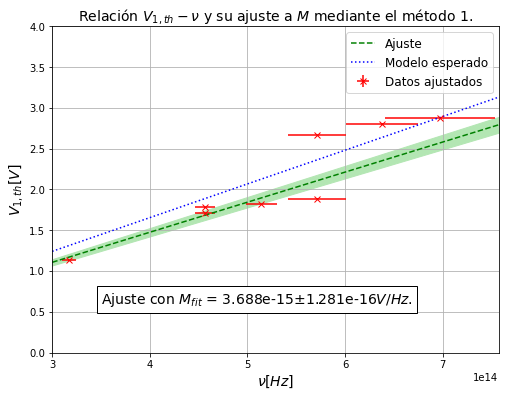

In [54]:
numin, numax = 3e14, nu.max()+0.6e14
nu_cont = np.linspace(numin,numax,100)

plt.figure(figsize=(8,6))
plt.errorbar(nu,V1th,sV1th,snu,"rx",label="Datos ajustados")
y_fit = V(nu_cont,M_fit)
plt.plot(nu_cont,y_fit,"g--",label="Ajuste")
sy_fit = sV(nu_cont,0,M_fit,sM_fit)
plt.fill_between(nu_cont,y_fit+sy_fit,y_fit-sy_fit,color=(0.7,0.9,0.7))
plt.plot(nu_cont,V(nu_cont,M_real),"b:",label="Modelo esperado")
plt.title(r"Relación $V_{1,th} - \nu$ y su ajuste a $M$ mediante el método 1.",fontsize=14)
plt.xlim(numin,numax)
plt.ylim(0,4)
plt.xlabel(r"$\nu[Hz]$",fontsize=14)
plt.ylabel(r"$V_{1,th}[V]$",fontsize=14)
posx , posy = 3.5e14, 0.6
props=dict(boxstyle='square', facecolor='white', alpha=1)
plt.text(posx, posy, r"Ajuste con $M_{fit}$ = "+"{:.3e}".format(M_fit)+"$\pm$"+"{:.3e}".format(sM_fit)+r"$V/Hz$.",
         fontsize=14, bbox=props)
plt.legend(fontsize=12)
plt.grid()
plt.show()

### Método 2

In [55]:
#Con cyan
V1th = np.array([2.03,1.96,2.42,2.43,2.16,2.72,2.89,1.19]) #V
sV1th = np.array([0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]) #V
Lamb = np.array([lamb_rojo,lamb_rojo,lamb_verde,lamb_verde,lamb_amarillo,lamb_cyan,lamb_azul,lamb_IR])*1e-9 #m
sLamb = np.array([slamb_rojo,slamb_rojo,slamb_verde,slamb_verde,slamb_amarillo,slamb_cyan,slamb_azul,slamb_IR])*1e-9 #m
nu = c/Lamb #Hz
snu = nu*sLamb/Lamb #Hz

In [65]:
print(snu)

[1.04179249e+13 1.04179249e+13 2.93674245e+13 2.93674245e+13
 1.58765486e+13 3.66428084e+13 5.67481667e+13 7.38549769e+12]


In [57]:
#Ajuste a h
popt, pcov = curve_fit(V, xdata = nu, ydata = V1th, sigma = sV1th)
M_fit = popt[0]
sM_fit = np.sqrt(pcov[0][0])
h_fit, sh_fit = M_fit*e, sM_fit*e
print("M_fit = "+str(M_fit)+" +- "+str(sM_fit))
print("h_fit = "+str(h_fit)+" +- "+str(sh_fit))
print("h_real = "+str(h_real))
print("Diferencia porcentual a la real: "+"{:.3f}".format(100*np.abs(h_fit-h_real)/h_real)+"%")

M_fit = 4.22431790349848e-15 +- 4.849292561101135e-17
h_fit = 6.7681034395731315e-34 +- 7.769423232826255e-36
h_real = 6.62607015e-34
Diferencia porcentual a la real: 2.144%


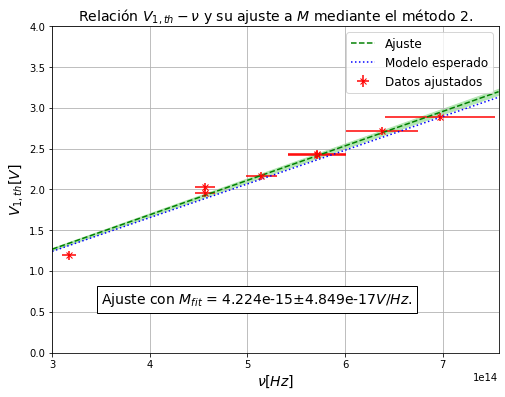

In [50]:
numin, numax = 3e14, nu.max()+0.6e14
nu_cont = np.linspace(numin,numax,100)

plt.figure(figsize=(8,6))
plt.errorbar(nu,V1th,sV1th,snu,"rx",label="Datos ajustados")
y_fit = V(nu_cont,M_fit)
plt.plot(nu_cont,y_fit,"g--",label="Ajuste")
sy_fit = sV(nu_cont,0,M_fit,sM_fit)
plt.fill_between(nu_cont,y_fit+sy_fit,y_fit-sy_fit,color=(0.7,0.9,0.7))
plt.plot(nu_cont,V(nu_cont,M_real),"b:",label="Modelo esperado")
plt.title(r"Relación $V_{1,th} - \nu$ y su ajuste a $M$ mediante el método 2.",fontsize=14)
plt.xlim(numin,numax)
plt.ylim(0,4)
plt.xlabel(r"$\nu[Hz]$",fontsize=14)
plt.ylabel(r"$V_{1,th}[V]$",fontsize=14)
posx , posy = 3.5e14, 0.6
props=dict(boxstyle='square', facecolor='white', alpha=1)
plt.text(posx, posy, r"Ajuste con $M_{fit}$ = "+"{:.3e}".format(M_fit)+"$\pm$"+"{:.3e}".format(sM_fit)+r"$V/Hz$.",
         fontsize=14, bbox=props)
plt.legend(fontsize=12)
plt.grid()
plt.show()

### Generación de tablas con corrientes

In [6]:
def Write(i):
    """
    Escribe la tabla de datos con V1, V2 e Ic ordenados.
    """
    Datos = np.loadtxt("Datos"+L[i]+".txt",skiprows=1).T
    Datos = Datos[:, Datos[0].argsort()] #Ordena datos
    
    ind = np.arange(0,len(Datos[0])) #Indice total de datos
    V1 = Datos[1][ind]
    V2 = Datos[0][ind]
    sV1 = Datos[3][ind]
    sV2 = Datos[2][ind]
    Ic = V2/R
    sIc = np.sqrt(V2**2*sR**2/(R**4)+(sV2/R)**2)
    
    DatosW = np.array([V1,sV1,V2,sV2,Ic,sIc]).T
    np.savetxt("Datos_tabla_"+L[i]+".txt",DatosW,fmt="%.0f\t%.1f\t%.1f\t%.2f\t%.2e\t%.2e") #Formato de cada columna, con tabulación

In [13]:
Write(7)